In [1]:
import ot 
import pickle
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from utils import get_distance
from partialOPW import opw_distance, entropic_opw_1,entropic_opw_2

# Data

In [2]:
file = open('extract_feature/resourses/features.pkl','rb')
data = pickle.load(file)

data0 = data[0]
data1 = data[1]
data2 = data[2]
data3 = data[3]
#...
data9 = data[9]

In [3]:
y1 = data3.astype('float64')
y2 = y1
y2 = np.concatenate((y2[:1],
                     data0[9].reshape(1,-1),
                     y2[1:8],
                     data0[0].reshape(1,-1),
                     y2[8:]),
                    axis = 0)

r_index = [1,0,2,3,5,4,6,7,9,8]
y3 = y1[r_index]
assert np.all(y1[0] == y3[1])
y3 = np.concatenate((y3[:1],
                     data9[9].reshape(1,-1),
                     y3[1:8],
                     data2[0].reshape(1,-1),
                     y3[8:]),
                    axis = 0)

# MAIN

In [5]:
D = get_distance(y2,y3,distance='cosin')
a = np.ones(y2.shape[0])/y2.shape[0]
b = np.ones(y3.shape[0])/y3.shape[0]

## Approach 1

In [11]:
lambda1 = 0.5
lambda2 = 0.1
delta = 1

In [6]:
T = entropic_opw_1(a, b, D, lambda1, lambda2, delta, m=5/6)
T.sum()

0.8333333333333335

<AxesSubplot:>

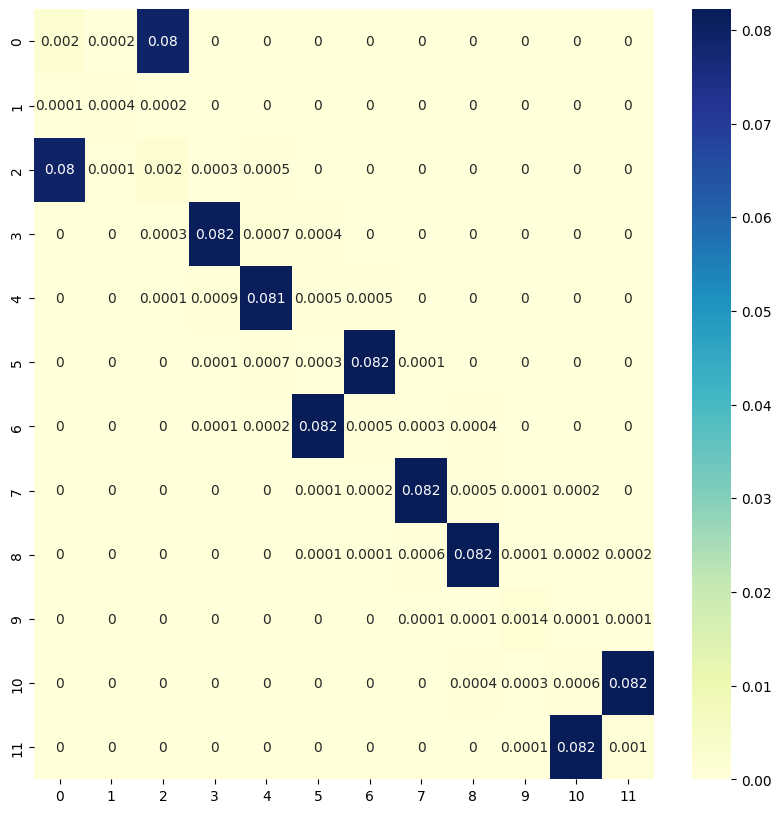

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(T.round(4),cmap="YlGnBu",annot = True)

## Approach 2

In [12]:
lambda1 = 0.5
lambda2 = 0.05
delta = 1

In [13]:
T = entropic_opw_2(a, b, D, lambda1, lambda2, delta, m=5/6 ,dropBothSides=True)

In [14]:
T[:12,:12].sum()

0.8333333332249926

<AxesSubplot:>

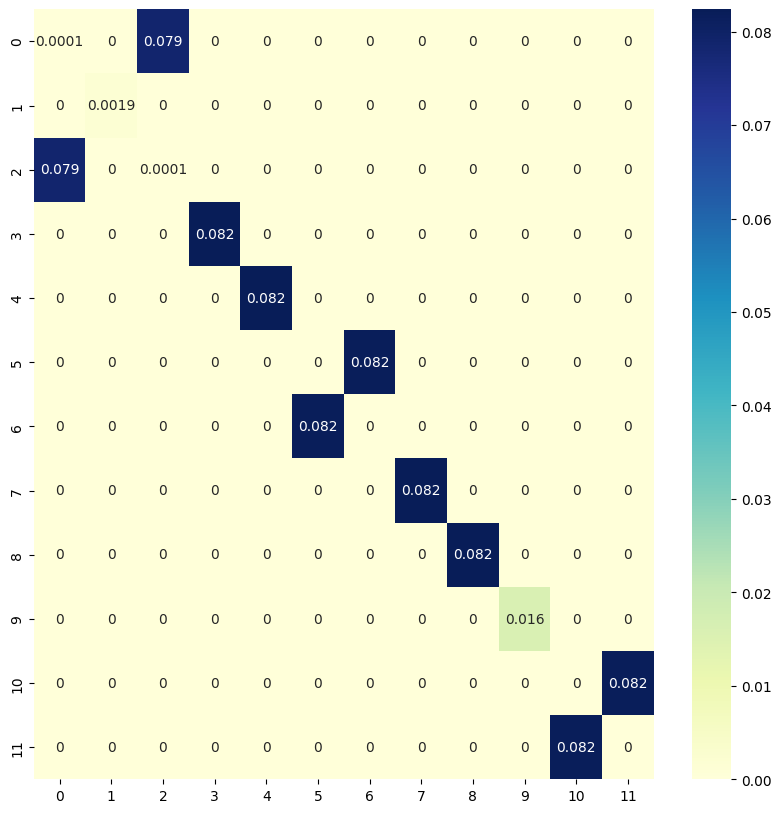

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(T[:12,:12].round(4),cmap="YlGnBu",annot = True)